# Felipe Castillo
# Data Preparation
# Milestone 5
# 03/04/2022

In [7]:
import requests
import wikipedia as wp
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pylab as plt
from urllib.request import urlopen
from scipy.stats import iqr
import numpy as np
import json
import os
import time
import re



os.chdir("C:\DataScience_DSC_540\MilestoneFolder")


In [11]:
import sqlite3 
import sqlalchemy as sqla

In [ ]:
#wiki_df.head(4)

In [ ]:
#senate_76_20_dfRowsDF.head(4)

In [ ]:
#df_congress_api.head(5)

In [ ]:
df_congress_api.columns

In [12]:
#connceting to sqlite
#mydata.sqlite
#making a data base 
con = sqlite3.connect("House_Representatives.db")

In [ ]:
con.commit()

In [ ]:
#making congress api table
df_congress_api.to_sql(name='congress_api', con=con)

In [ ]:
#making sentate csv table 
senate_76_20_dfRowsDF.to_sql(name='senate_csv', con=con)

In [ ]:
#making house rep wiki table
wiki_df.to_sql(name='House_Rep_Wiki', con=con)

In [ ]:
#con.execute(query)

In [13]:
conn = sqlite3.connect('House_Representatives.db')

In [14]:
#establishing cursor for data base
cursor = conn.cursor()

In [15]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

In [16]:
#two tables inside db
# making sure all tables are create 
print(cursor.fetchall())

[('congress_api',), ('senate_csv',), ('House_Rep_Wiki',)]


In [17]:
#priting api table make sure it works 
print('\n---------DATA ROWS For API Data Set-----------:')
data=cursor.execute('''SELECT * from congress_api''')
#for i in data:
    #print(i)


---------DATA ROWS For API Data Set-----------:


In [18]:
#print senate data table
print('\n---------DATA ROWS For CSV  Data Set-----------:')
data=cursor.execute('''SELECT * from senate_csv''')
#for i in data:
 #   print(i)


---------DATA ROWS For CSV  Data Set-----------:


In [19]:
#printing wiki table 
print('\n---------DATA ROWS For Website  Data Set-----------:')
data=cursor.execute('''SELECT * from House_Rep_Wiki''')
#for i in data:
    #print(i)


---------DATA ROWS For Website  Data Set-----------:


irst graph will include data from three different data sets. The graph will take the amount of congress men mentioned in each data source. Mentioned and none mentioned will be accounted for and distributed in a pie chart. This is important to show the different people across data sets.

Step 1: Getting data from all 3 tables

In [21]:
#combinding all tables into one larger table
data_combind=cursor.execute('''select candidate_name,state,total_pac_money from congress_api union all select candidate,state,state_fips from senate_csv union all select Candidate,Poli_Party, Age from House_Rep_Wiki''')

Step 2: storing only names

In [22]:
#storing names
names_combind_array = []

for i in data_combind:
    #checking that there is no numeric values in data 
    if(str(i[0]).isnumeric() == False):
        #only allowing names to pass
        names_combind_array.append(str(i[0]))
        
#print(names_combind_array)

Step 3: Making sure names are only accounted once, if felipe then I can insert another Felipe

In [23]:
#making a unique reference name
unique_names = []

for name in names_combind_array:
    #if the uniques column doesn have names
    if name not in unique_names:
        #append names not in unique table
        unique_names.append(name)
#print(unique_names)

Step 4: Adding a count for names the appear more then once.

In [24]:
# find the names in the 3 data sources
# this is important to see if the candiate is mentioned in all data set
#this will be accomplish with contain

#setting dic to empty 
namedic = {}

# Getting uique day values
for name in unique_names:
    
    #setting a current age values
    current_name = name
    count = 0
    #if an occurance of the unique value add counter
    for j in names_combind_array:
        #Checking to is if unique value contains pointed values
        #adding counter to time metioned
        if(j in current_name):
            count = count + 1
    # Making sure there are no null values
    if(name != ''):
        namedic[name] = count
        
    
        
#print(namedic)
        

Step 5: Checking if the values in dictionary contains names and if value is greater then one. This mean the name was reapted in a different data sources.

In [26]:
#storing repeated and not repeated balues
names_dataset_dic ={}

#iterating key and value of the names counter 
for key, value in namedic.items():
    #if the person is mention more then 1 time it means they are share names in data sets
    if int(value) > 1:
        #setting a counter inside of dictionary
        #if the value is greater then one the counter of repated increase by one
        names_dataset_dic["Repeated"] =  names_dataset_dic.get("Repeated", 0) + 1
    else:
        #the value is not repeated the value increase by one 
         names_dataset_dic["Not Repeated"] =  names_dataset_dic.get("Not Repeated", 0) + 1
        
print(names_dataset_dic)       


{'Repeated': 189, 'Not Repeated': 776}


Step 6: Plot dictionary into pie char

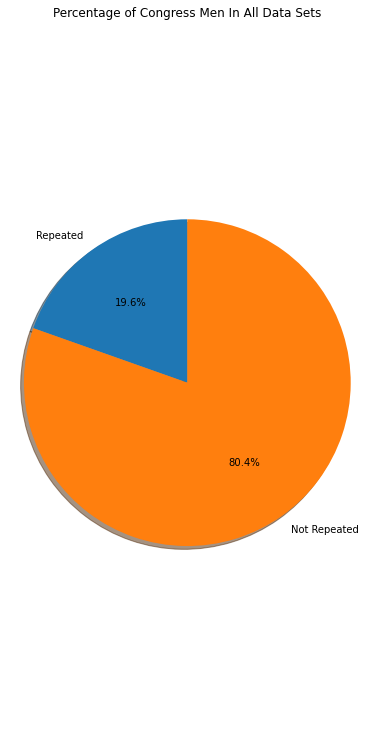

In [27]:
# This means all data sets mention the congress men by name
# This also means that a percntage have been both sentors and house of represnetatives
labels = names_dataset_dic.keys()

#setting plot figure size
fig = plt.figure(figsize=(10,10))
ax = fig.add_axes((0,0,.5,1))
#setting name
plt.title("Percentage of Congress Men In All Data Sets")
#unpacking values in pie
ax.pie(names_dataset_dic.values(),  labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')  
plt.show()

Second table will contain two different data source. This table will see if the data is objective or if it is fair to all parties. If its only democratic information, an assessment can be made for republican.

Step 1: Taking data from senate csv and house wiki

In [31]:

# checking two tables that mention political parties
#seeing if the data is objective or if its leaning towards one side over the other
data_combind=cursor.execute('''select candidate,political_parties,state_fips from senate_csv  union all select Candidate,Poli_Party, Age from House_Rep_Wiki''')

Step 2: Check  and store the ammount of occurences per party. In this case we care about main parties democrat and repblican.

In [32]:

#stored rublicans
party_aff_r = []
#store democrats
party_aff_d = []

#Two tables are combind in one
#iterating throught tables one is lower case and the other is upper case
for obj in data_combind:
    #print(obj[1])
    #checking if data is this or that
    if(obj[1] == 'Republican' or obj[1] == 'REPUBLICAN' ):
        #print('----r----' , obj[0])
        #appending as r
        party_aff_r.append('R')
        
    #checking if data is this or that
    if(obj[1] == 'Democratic'or obj[1] == 'DEMOCRAT'):
        #print('----d---',obj[0])
        #appending d
        party_aff_d.append('D')


Step: 3 combinded occurence into one array by count.

In [33]:
#both arrays will be combind into one 
poli_compare_list = []
#append the aount of r in party aff r
poli_compare_list.append(len(party_aff_r))
#append the aount of d in party aff d
poli_compare_list.append(len(party_aff_d))

Step: 4 plot bar graph.

<BarContainer object of 2 artists>

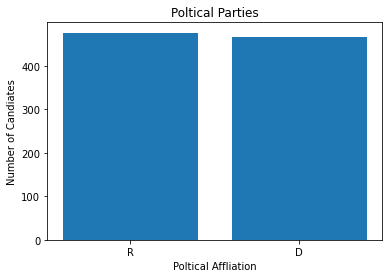

In [34]:
#setting labels for bar graph
labels = ['R','D']
plt.title("Poltical Parties")
plt.xlabel("Poltical Affliation")
plt.ylabel("Number of Candiates")

#pushing labels and combined array
plt.bar(labels, poli_compare_list)

#looks very close but there is more republicans data 

Table 3 only looks at congress api table to get a better understanding of political contributions.

Step 1: Getting and store total_contributions

In [35]:
candidate_finance = []

#taking api information total contributions
data=cursor.execute('''SELECT candidate_name,total_contributions from congress_api''')
for i in data:
    #appending into and array
    candidate_finance.append(i[1])

Step 2: Converting it into a np array for better handling

In [36]:
#converting it into a np array 
cand_finance = np.array(candidate_finance)

Step 3: Plot Histogram

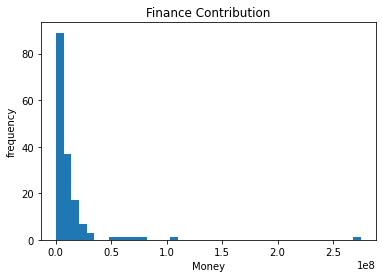

In [37]:
#Made a historgram of financal cntribution for congress men 
#has an obvious outlier
plt.title("Finance Contribution")
plt.hist(cand_finance, bins=40)  
plt.ylabel('frequency')
plt.xlabel('Money');

The fourth table will show the total amount contribution made to each state.

Step 1: Getting congress api table.

In [65]:
#Seleting total contributions
data=cursor.execute('''SELECT state,total_contributions from congress_api''')

Step 2: Storing state and contributions to its own list.

In [64]:
# unpacking data into two separte list
#x contians state, y contains total_contributions
x,y = zip(*data)

stateList = list(x)
finList =  list(y)


Step: 3 Add all of the state contributions instance to one state. Example if there are 5 sentors from tx it will take their contributions and total it all to tx.

In [66]:

#will contain total fincail information for sate
state_fin_dic ={}


#unpacking into state and finances 
for state,finances in data:
    #will store total finances by state
    temp_finances = 0
    #for each state it will look to see if state has a finacial record
    for i in range(len(stateList)):
        #if the same state has record 
        if(stateList[i] == state):
            #add the last occurence of finances + the current one
            temp_finances = temp_finances + float(finList[i])
    #store total by state in dictionary
    state_fin_dic[state] = temp_finances
print(state_fin_dic)
        
        

{'KY': 89495385.83, 'LA': 17301008.0, 'TX': 47223913.21, 'AR': 27159344.0, 'KS': 6463693.0, 'MS': 6618097.0, 'NC': 66657740.760000005, 'CA': 38912034.97, 'CO': 39721376.89, 'VA': 48977819.85, 'MA': 53322423.220000006, 'TN': 20157641.04, 'MI': 84138015.13, 'SC': 124339631.64, 'AK': 13987695.0, 'MD': 15134285.36, 'WV': 7664254.0, 'OH': 73378921.46, 'WI': 7942978.05, 'UT': 8470978.41, 'NV': 48347559.0, 'MO': 45947810.0, 'NY': 48134133.0, 'IA': 38766710.519999996, 'FL': 71356708.71000001, 'PA': 69992346.17, 'IL': 52062810.94, 'WA': 22264900.0, 'AZ': 106036647.24, 'MT': 37945745.09, 'NE': 5965810.0, 'CT': 26768720.0, 'NJ': 12677880.0, 'MN': 30415006.310000002, 'ND': 32871365.41, 'NM': 4672290.0, None: 274759008.0, 'SD': 24563752.0, 'GA': 152847864.96, 'NH': 2825880.0, 'IN': 17925880.869999997, 'AL': 3532664.0, 'OR': 10594701.84, 'WY': 5391614.77, 'ME': 25685278.84}


Step 4: Plot line graph

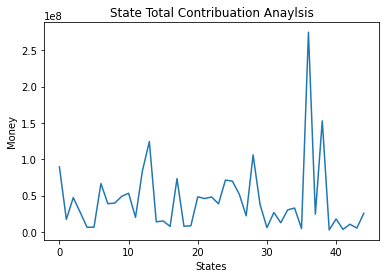

In [67]:
#setting a line graph to see total contributions comaprision 
plt.title("State Total Contribuation Anaylsis")
plt.ylabel("Money")
plt.xlabel("States")
plt.plot(list(state_fin_dic.values()))

Table 5 takes in one table and checks if there is an anomoly in years and total votes.

Step 1: Take year and votes from sentate table

In [68]:
#seeing if there is an anomoly for years and candidate votes
#perhapes some years peopple vote more then others 
data=cursor.execute('''select year,candidatevotes from senate_csv ''')

Step 2: Unpack and plot scatter plot 

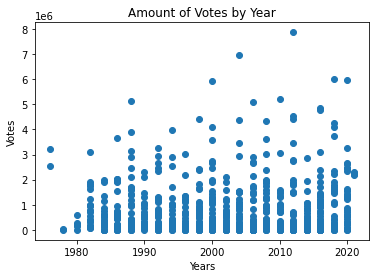

In [69]:
#unpacking year, votes 
x,y = zip(*data)
plt.title("Amount of Votes by Year")
plt.xlabel("Years")
plt.ylabel("Votes")
plt.scatter(x, y)


# Summary

Coming into this class, I didn’t know much about data wrangling. As a software engineer, I am responsible for data manipulation and knowing how to handle small amounts of data. However, I have never had to dig through all the data as I did at school. At the start, it was a little over whelming not knowing which graph to use or which package was best for handling issues. 
To complete my project, I had to take what I learned each week and apply it back to my milestone. The data showed that Congress gets a lot of money in contributions. Most of my questions I had were answered. There are some congress men that have been in office for longer than I have been alive. Overall, what made this project easier is that I am passionate about politics.

In this class I learned to handle large amounts of data. I also learned to make sense out of the data.  I never worked with SQLite even though I work with SQL server. It was so different! I never imagined that I could run SQL without having to set up a server and the IDE. SQLite became one of my favorite methods to use SQL. I also was introduced to beautiful soup. Although, it’s not my favorite, I know how to use it. 


Honestly, the ethical implications frighten me more now. How would anyone know if I manipulated the data to my own will? When you work with data, you have power to shape it to tell a story. More than ever it’s important to be honest and to be careful when working with data. When working with a large amount of data, it is easy to lose yourself and increase the chances of errors. During this class, I read a lot about ethical issues. It doesn’t seem like a lot of companies follow them. I know that I will follow the ethics provided to me.


Overall, I have had a blast in this class. No, I didn’t like the long homework hours just like an athlete doesn’t like training. Now, I feel like I can actually do a lot! In fact, I have been using some of the stuff I am learning in school at work. The class students were smart, and I learned a lot. I ended up coding more in this class which I am grateful. Some say school is a waste of time. Now, you can learn the same technology on Udemy for pennies on the dollar. In this case, I don’t feel like I wasted my time. It was well worth it, and I recommend it to anyone that is serious about data science.
